# Project

The following project is an exploratory data analysis of the top 100 songs on spotify in 2017. Through EDA we try to answer questions like "Who are top 20 artists", "Top 100 songs are in which keys", "Is there any correlation between the features that are used to describe these tracks", "Can we predict a feature with the help of other features". Although the dataset is too small, I attempted to build a model which predicts the mode(minor or major) of the song based on other features. Decision tree and random forest algorithms were used to build the models. GridSearch CV was used to find the best values for the model parameters. Future work could involve replicating the same analysis with a larger dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
#Set options in Pandas to avoid 'e' values in the cells
pd.options.display.float_format = '{:20,.2f}'.format
#Set options in Pandas to display non-truncated values in cells
pd.set_option('display.max_colwidth', -1)

# Descriptive Analysis

In [7]:
path = '../data/'
file = os.path.join(os.pardir,'data','featuresdf.csv')


In [4]:
#Read the Csv file
top_tracks = pd.read_csv(file)

In [5]:
#Display the top 5 rows
display(top_tracks.head())

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.82,0.65,1.00,-3.18,0.00,0.08,0.58,0.00,0.09,0.93,95.98,"233,713.00",4.00
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.69,0.81,2.00,-4.33,1.00,0.12,0.23,0.00,0.09,0.81,88.93,"228,827.00",4.00
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.66,0.79,2.00,-4.76,1.00,0.17,0.21,0.00,0.11,0.85,177.83,"228,200.00",4.00
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.62,0.64,11.00,-6.77,0.00,0.03,0.05,0.00,0.16,0.45,103.02,"247,160.00",4.00
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.61,0.67,7.00,-4.28,1.00,0.04,0.06,0.00,0.17,0.81,80.92,"288,600.00",4.00


In [6]:
#Shape of the dataset
print("No. of rows:{:>28d}".format(top_tracks.shape[0]))
print("No. of columns:{:>25d}".format(top_tracks.shape[1]))

No. of rows:                         100
No. of columns:                       16


In [8]:
#Examine the values
top_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [9]:
display(top_tracks.describe())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,0.70,0.66,5.57,-5.65,0.58,0.10,0.17,0.00,0.15,0.52,119.20,"218,387.28",3.99
std,0.13,0.14,3.73,1.80,0.50,0.10,0.17,0.03,0.08,0.22,27.95,"32,851.08",0.10
min,0.26,0.35,0.00,-11.46,0.00,0.02,0.00,0.00,0.04,0.09,75.02,"165,387.00",3.00
25%,0.64,0.56,2.00,-6.59,0.00,0.04,0.04,0.00,0.10,0.38,99.91,"198,490.50",4.00
50%,0.71,0.67,6.00,-5.44,1.00,0.06,0.11,0.00,0.12,0.50,112.47,"214,106.00",4.00
75%,0.77,0.79,9.00,-4.33,1.00,0.12,0.23,0.00,0.18,0.68,137.17,"230,543.00",4.00
max,0.93,0.93,11.00,-2.40,1.00,0.43,0.69,0.21,0.44,0.97,199.86,"343,150.00",4.00


In [10]:
#Data Dictionary
features = []
min_max = []
data_type = []
numerical = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']
for col in top_tracks.columns:
    if col in numerical:
        min_max = min_max +['{}'.format(round(top_tracks[col].min(),1))+'-{}'.format(top_tracks[col].max())]
    elif col=='id':
        min_max = min_max+['Spotify URI']
    else:
        min_max = min_max+['Text']
    data_type = data_type + [top_tracks[col].dtype]
    features = features + [col]

In [11]:
#Print the dictionary
data_dict = pd.DataFrame({'Range':min_max,
               'Datatype':data_type,
              'Description':['Spotify URI of the song',
                             'Name of the song','Artists(s) of the song',
                             'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.',
                             'Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.',
                             'The key the track is in.',
                             'The overall loudness of a track in decibels (dB).',
                             'Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.',
                             'Speechiness detects the presence of spoken words in a track.',
                             'A confidence measure from 0.0 to 1.0 of whether the track is acoustic.',
                             'Predicts whether a track contains no vocals.',
                             'Detects the presence of an audience in the recording.',
                             'A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.',
                             'The overall estimated tempo of a track in beats per minute (BPM).',
                             'The duration of the track in milliseconds.',
                             'An estimated overall time signature of a track']
               },index=features)
display(data_dict)

,Range,Datatype,Description
id,Spotify URI,object,Spotify URI of the song
name,Text,object,Name of the song
artists,Text,object,Artists(s) of the song
danceability,0.3-0.927,float64,"Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
energy,0.3-0.932,float64,Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
key,0.0-11.0,float64,The key the track is in.
loudness,-11.5--2.396,float64,The overall loudness of a track in decibels (dB).
mode,0.0-1.0,float64,"Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived."
speechiness,0.0-0.431,float64,Speechiness detects the presence of spoken words in a track.
acousticness,0.0-0.695,float64,A confidence measure from 0.0 to 1.0 of whether the track is acoustic.


# Data Visualization


In [12]:
#Find the number of artists
no_of_artists = len(top_tracks['artists'].unique())
print("The total number of artists : {}".format(no_of_artists))

The total number of artists : 78


In [13]:
top_20_artists = top_tracks['artists'].value_counts().nlargest(20)
top_20_df = pd.DataFrame({'Number of entries':top_20_artists.values,
              'Artist':top_20_artists.index},index=np.arange(20))

In [14]:
plt.rcParams['figure.figsize']=25,20
sns.set_style('whitegrid')
sns.set_context(rc={'axes.labelsize':'28','axes.titlesize':'30','xtick.labelsize':'20','ytick.labelsize':'20','axes.labelcolor':'#25237F','axes.grid':True})
sns.set_palette('Spectral',n_colors=20)

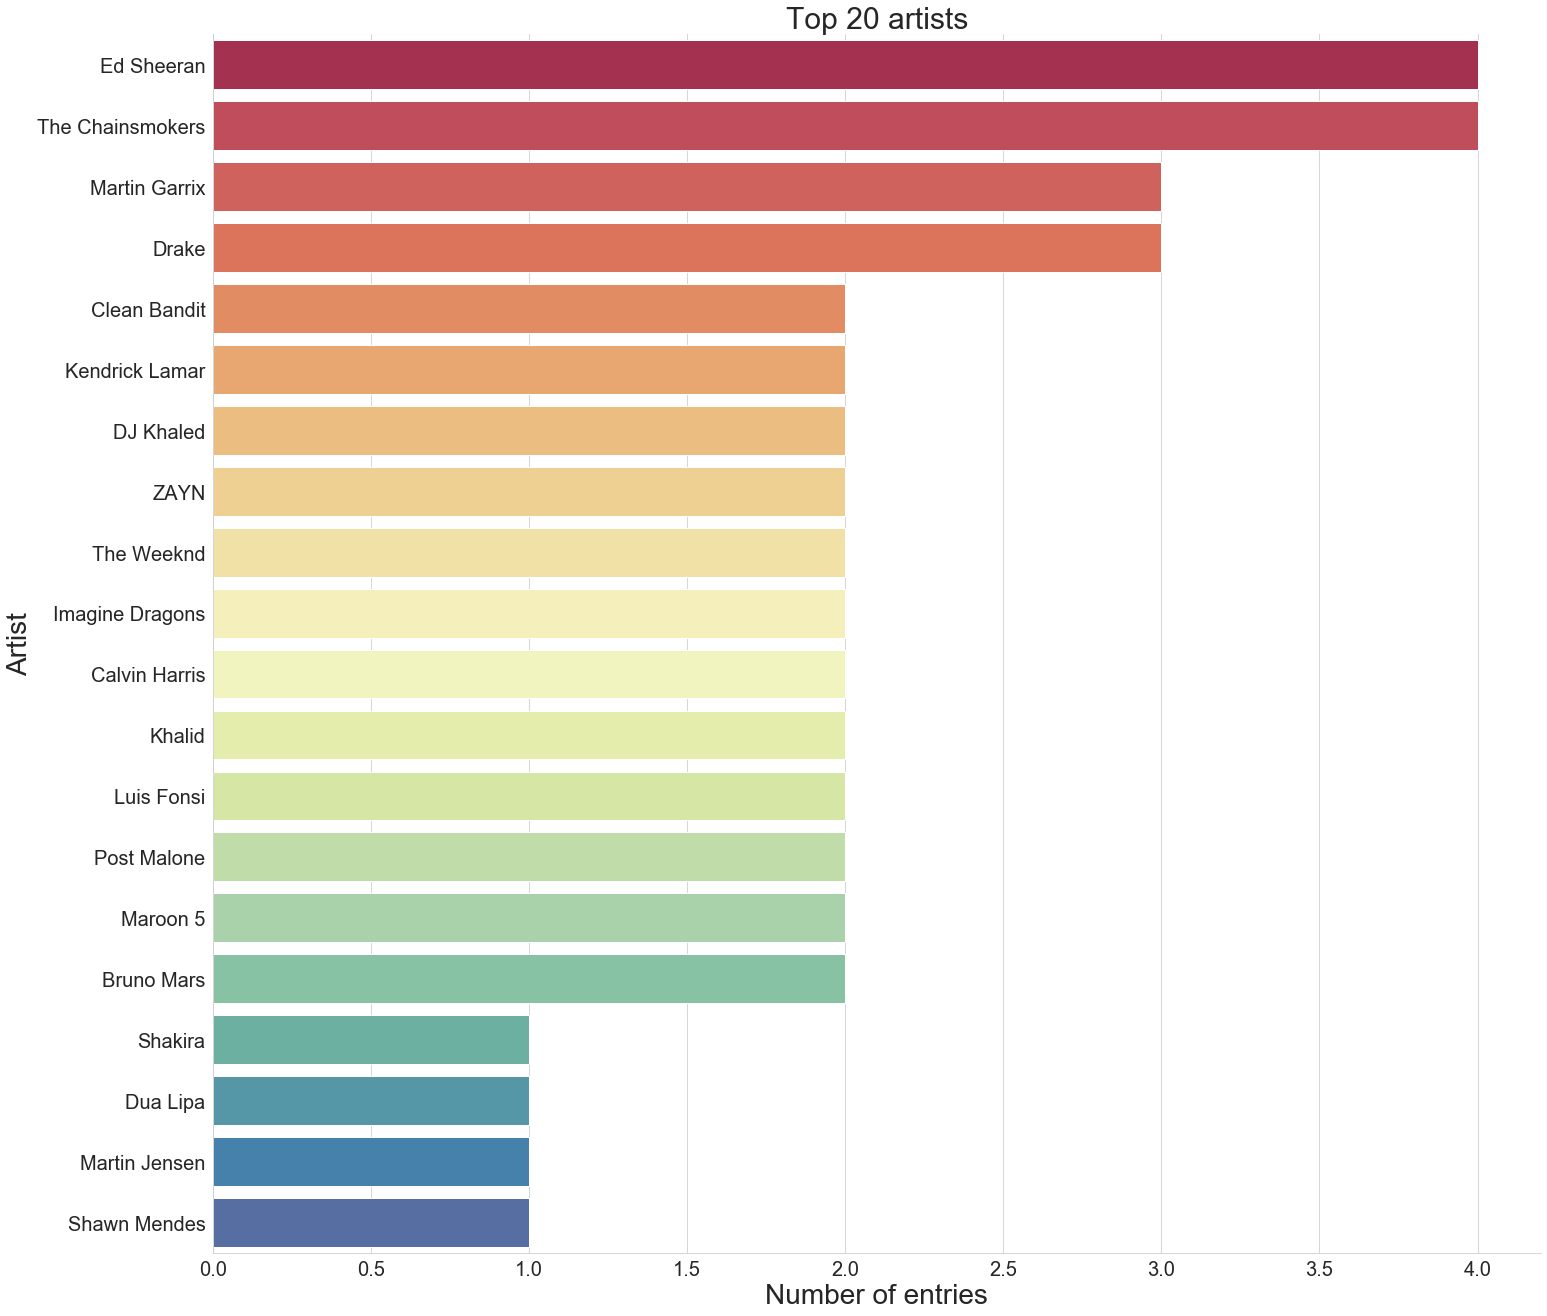

In [15]:
#Disaply the top artists
sns.catplot(x='Number of entries',y='Artist',data=top_20_df,kind='bar',height=18,aspect=1.2)
plt.title('Top 20 artists')
plt.show()

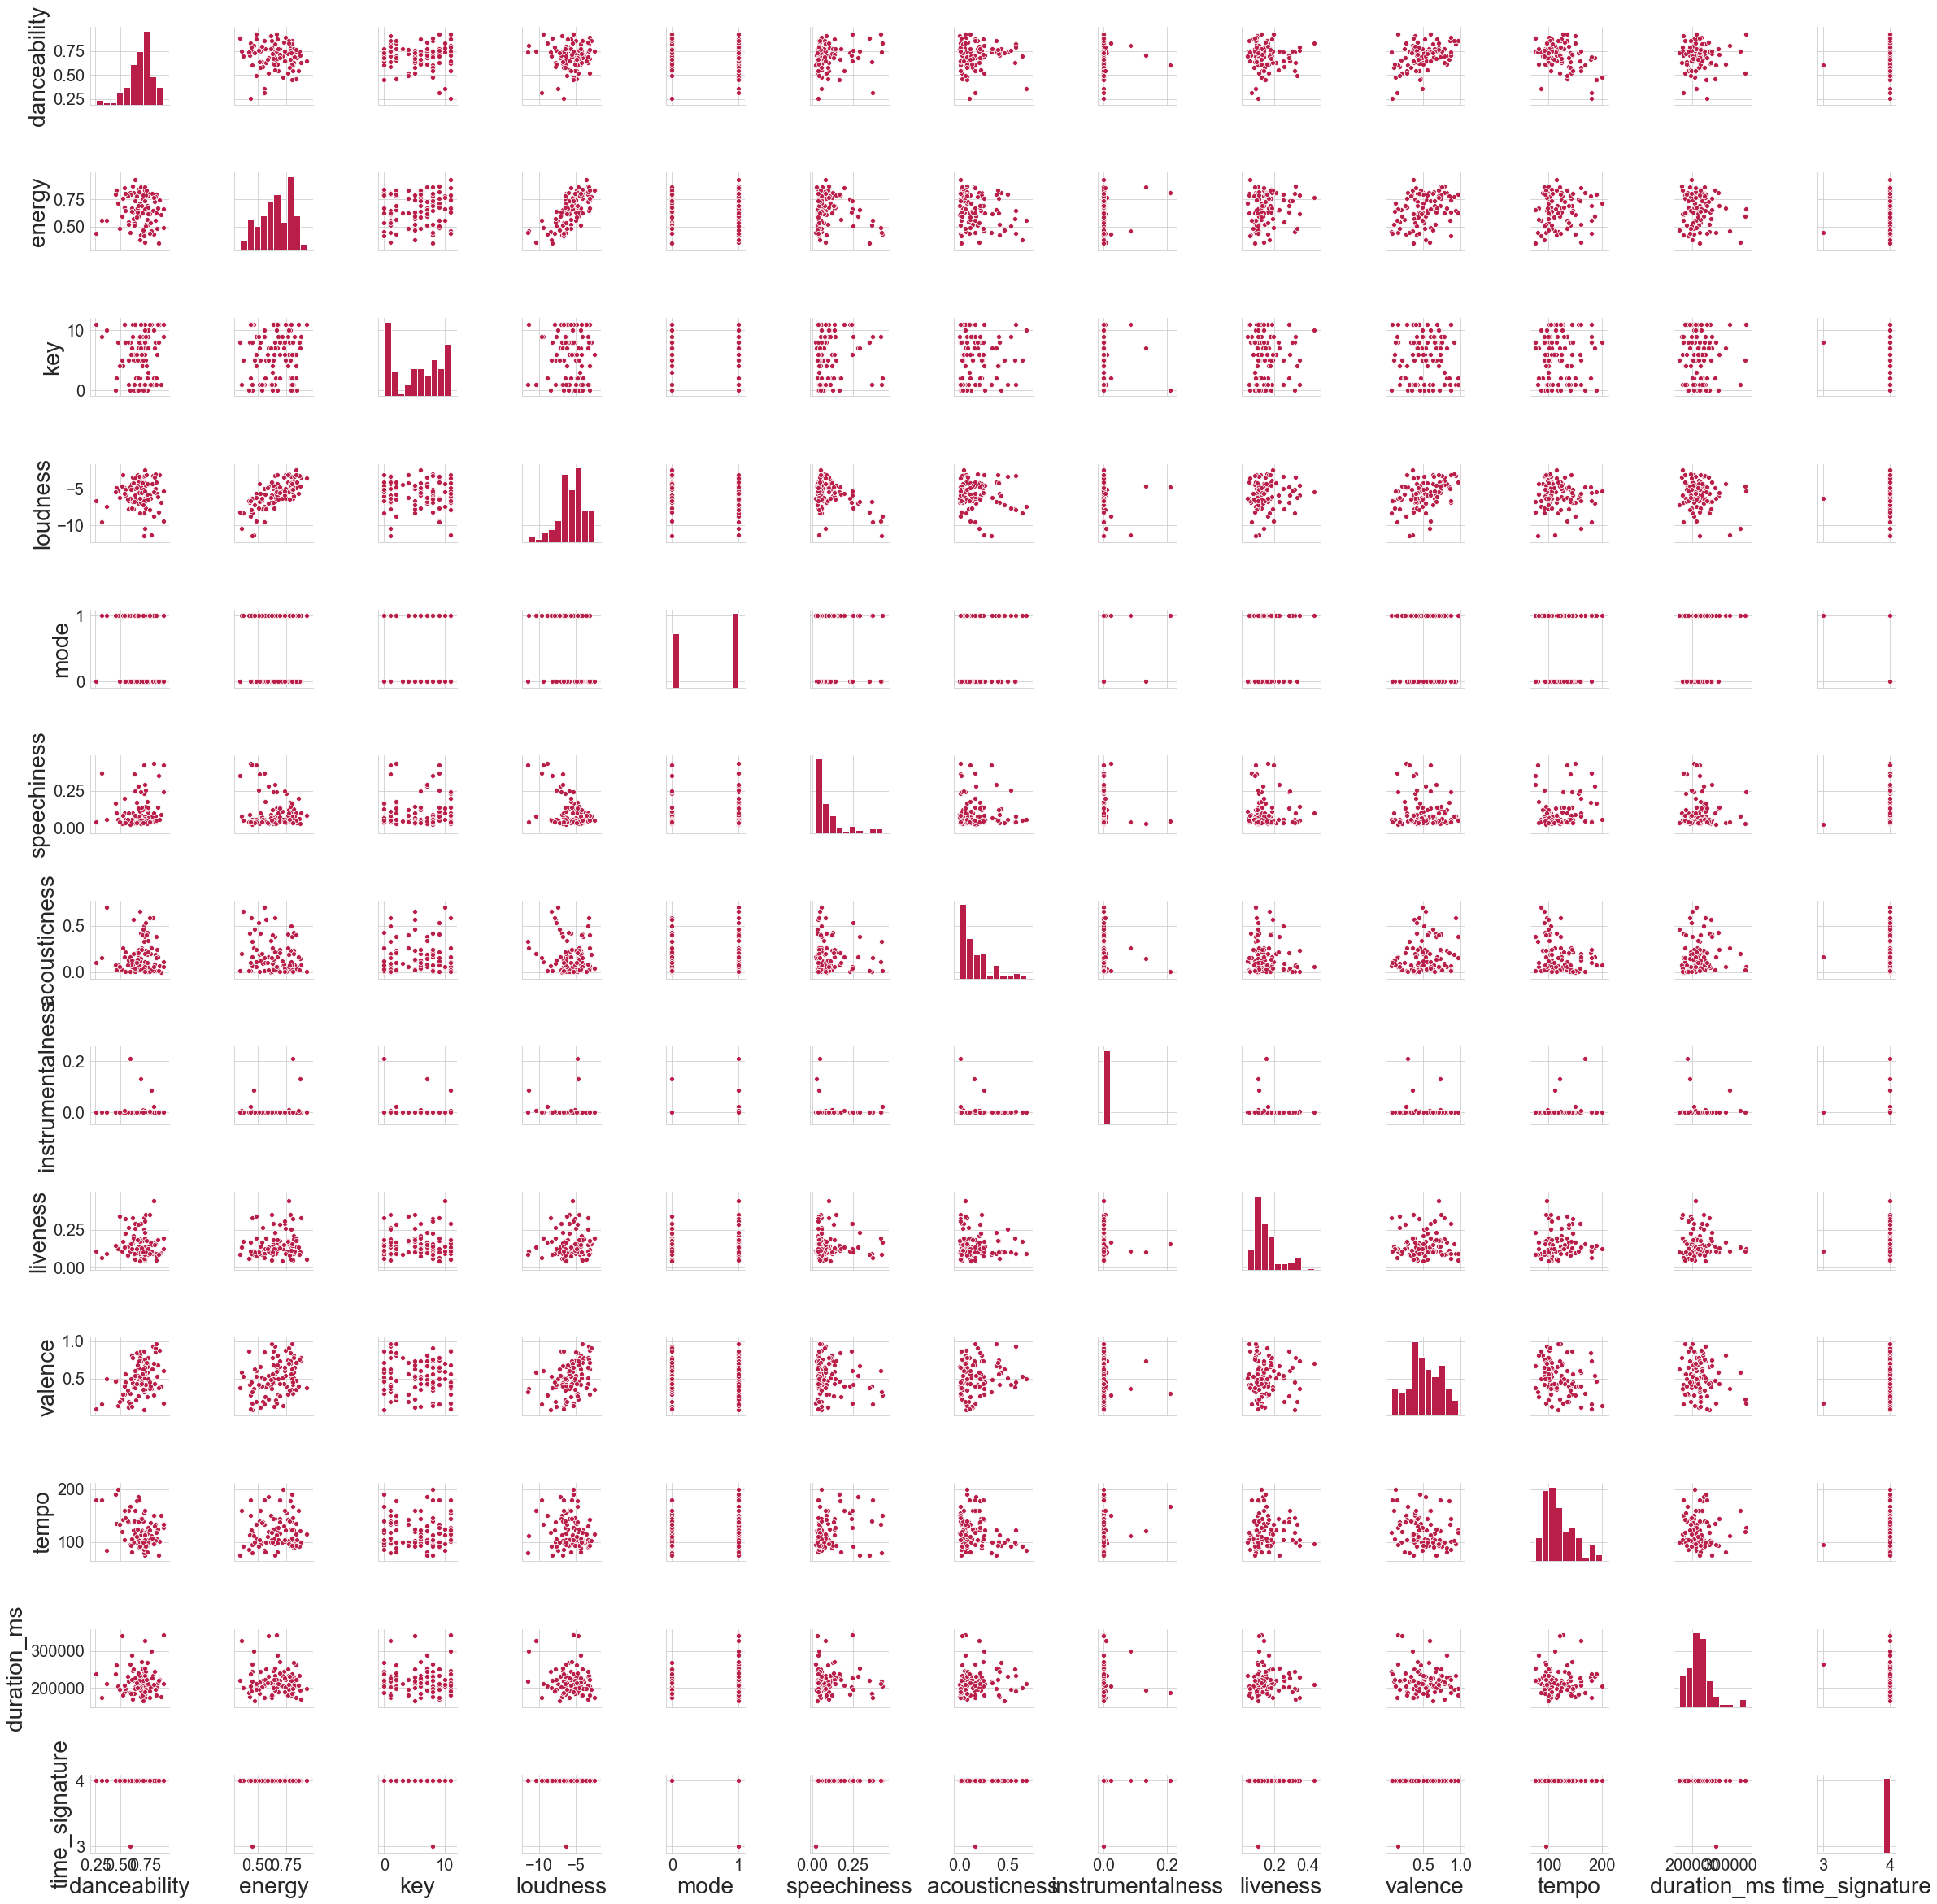

In [16]:
#Scatter matrix
sns.pairplot(top_tracks)
plt.show()

In [17]:
#Correlation matrix
corr = top_tracks.corr()

display(corr)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.00,-0.06,-0.07,0.05,-0.07,0.11,0.04,-0.02,-0.04,0.42,-0.36,0.01,0.08
energy,-0.06,1.00,0.05,0.71,-0.08,-0.21,-0.25,0.10,0.15,0.32,0.03,-0.09,0.15
key,-0.07,0.05,1.00,-0.05,-0.16,0.07,0.02,-0.06,-0.01,-0.02,0.01,0.01,-0.07
loudness,0.05,0.71,-0.05,1.00,-0.09,-0.44,-0.15,-0.06,0.06,0.41,-0.14,-0.14,0.04
mode,-0.07,-0.08,-0.16,-0.09,1.00,0.02,0.07,0.05,-0.00,-0.02,0.10,0.11,-0.09
speechiness,0.11,-0.21,0.07,-0.44,0.02,1.00,-0.06,-0.08,-0.02,-0.11,0.17,-0.01,0.09
acousticness,0.04,-0.25,0.02,-0.15,0.07,-0.06,1.00,-0.07,-0.14,0.13,-0.25,0.04,0.00
instrumentalness,-0.02,0.10,-0.06,-0.06,0.05,-0.08,-0.07,1.00,-0.04,-0.06,0.15,-0.03,0.02
liveness,-0.04,0.15,-0.01,0.06,-0.00,-0.02,-0.14,-0.04,1.00,-0.00,0.05,-0.05,0.06
valence,0.42,0.32,-0.02,0.41,-0.02,-0.11,0.13,-0.06,-0.00,1.00,-0.29,-0.12,0.16


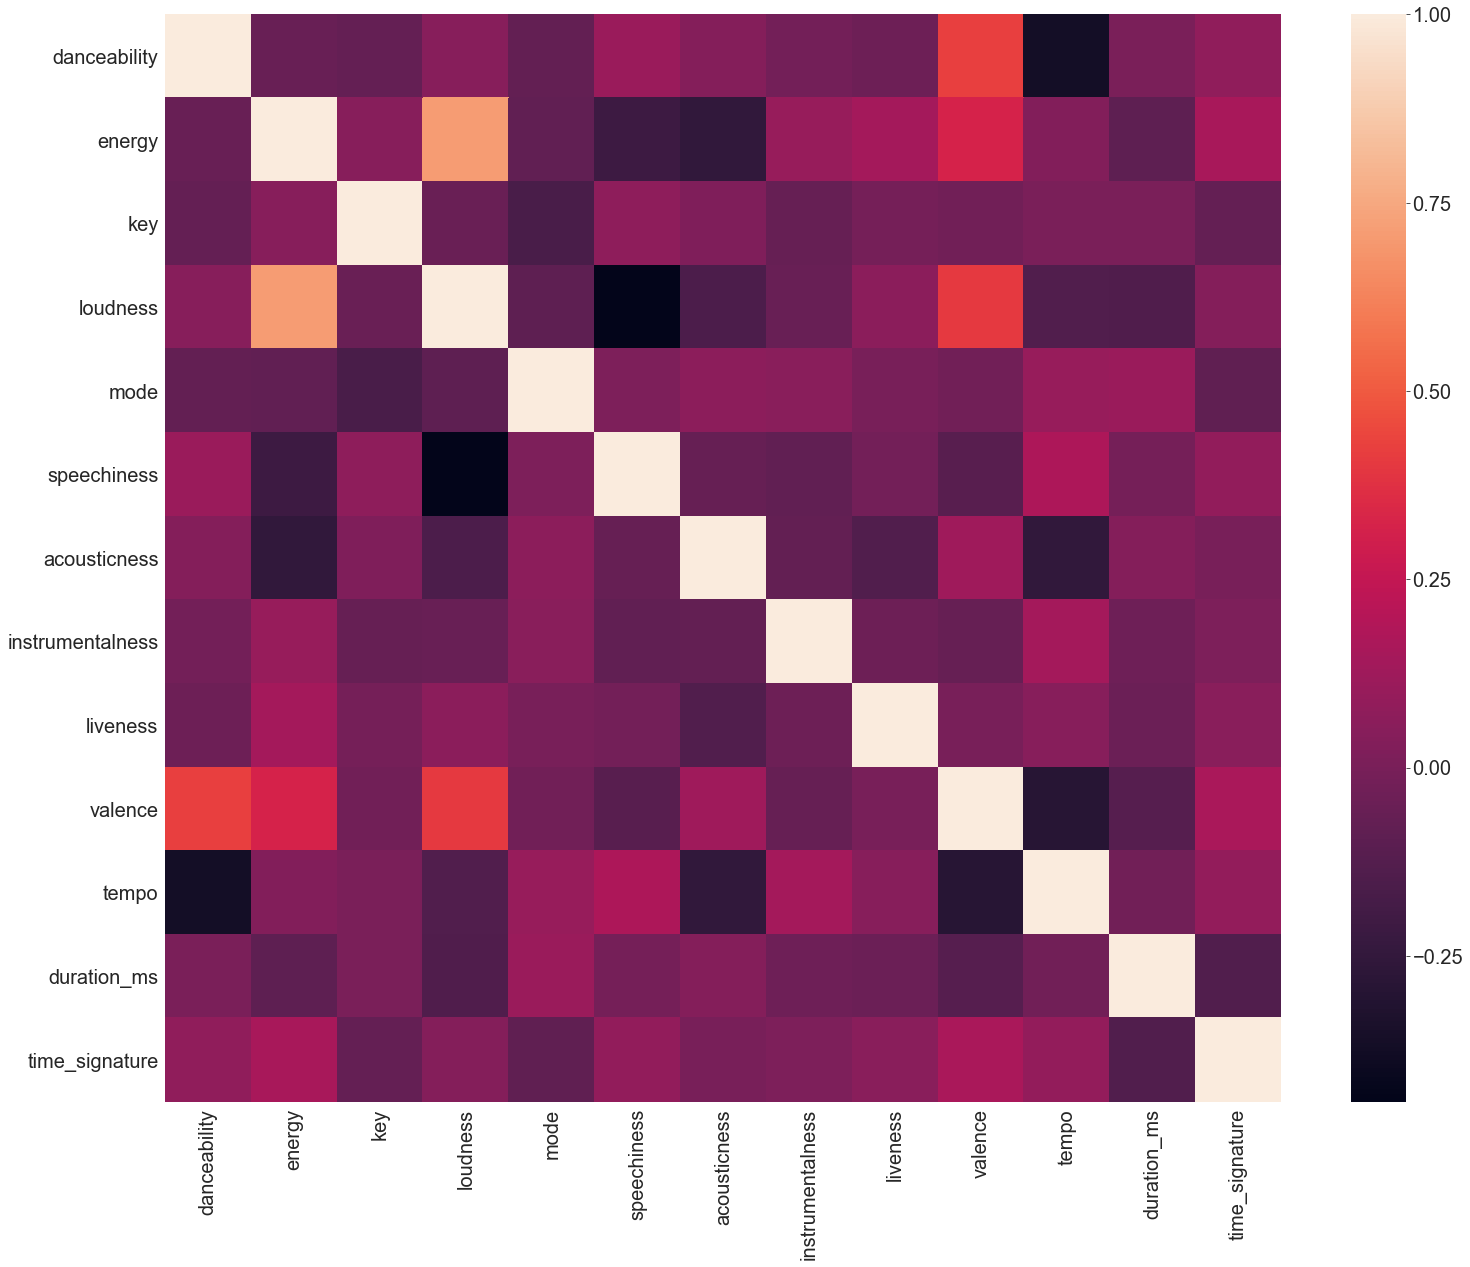

In [18]:
#Correlation heatmap
sns.heatmap(corr)
plt.show()

In [19]:
#POpular song keys
top_keys=top_tracks['key'].value_counts()

In [20]:
top_keys_df = pd.DataFrame({'Key':['C#/Db','B','Ab/G#','C','A','F','F#/Gb','D','G','E','Bb/A#','Eb/D#'],
              'Number of songs':top_keys.values})


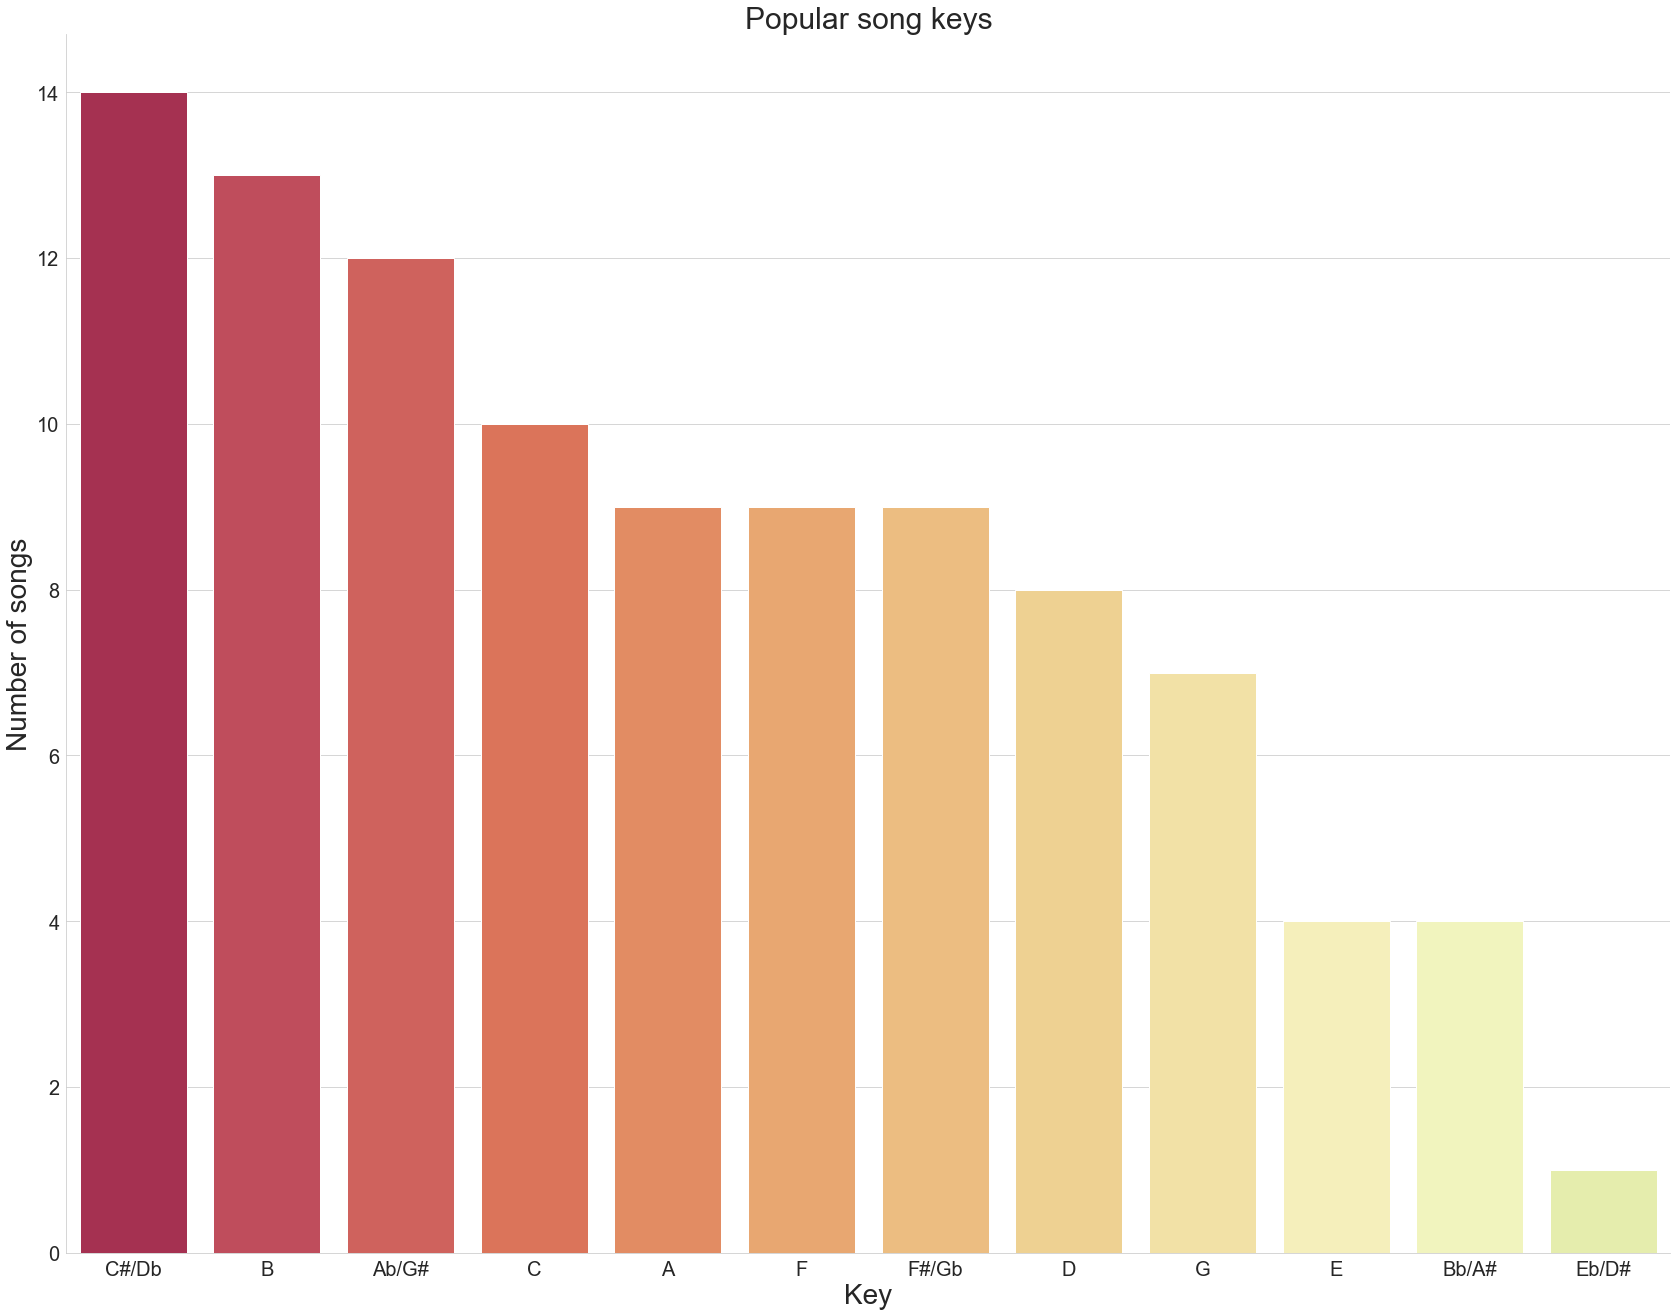

In [21]:
sns.catplot(x='Key',y='Number of songs',data=top_keys_df,kind='bar',height=18,aspect=1.3)
plt.title('Popular song keys')
plt.show()

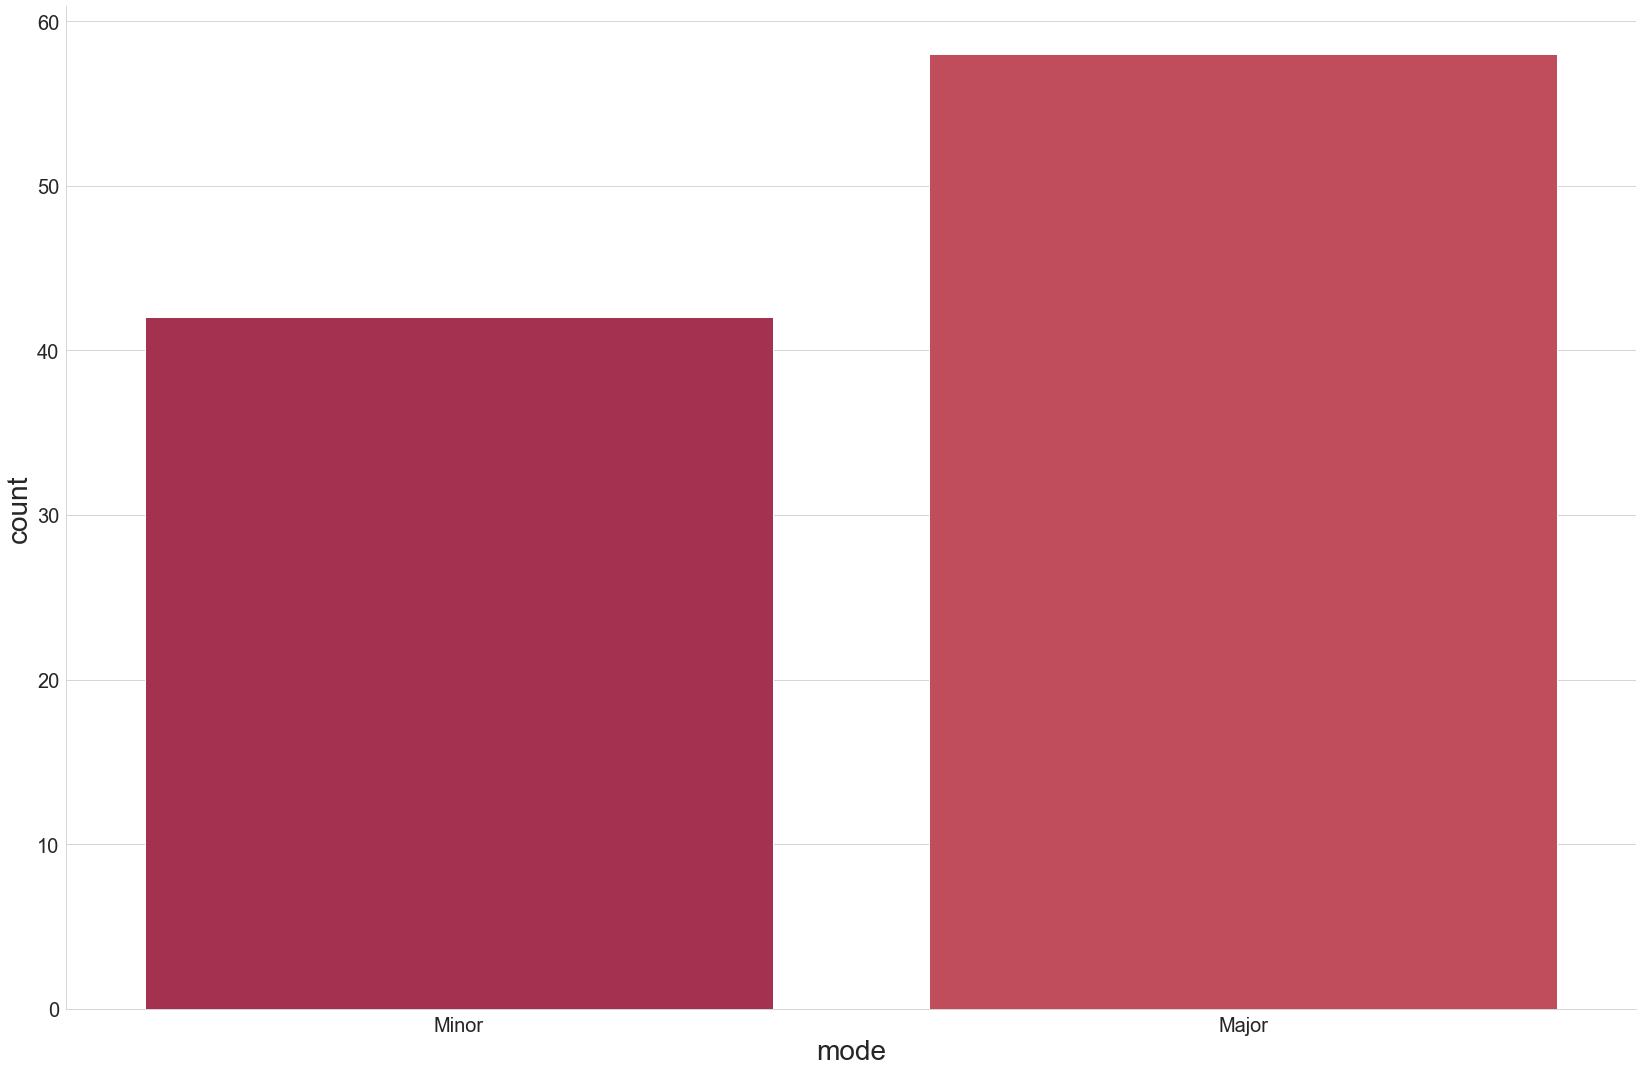

In [22]:
#Mode
ax=sns.catplot(x='mode',data=top_tracks,kind='count',height=15,aspect=1.5)
ax.set_xticklabels(['Minor','Major'])
plt.show()

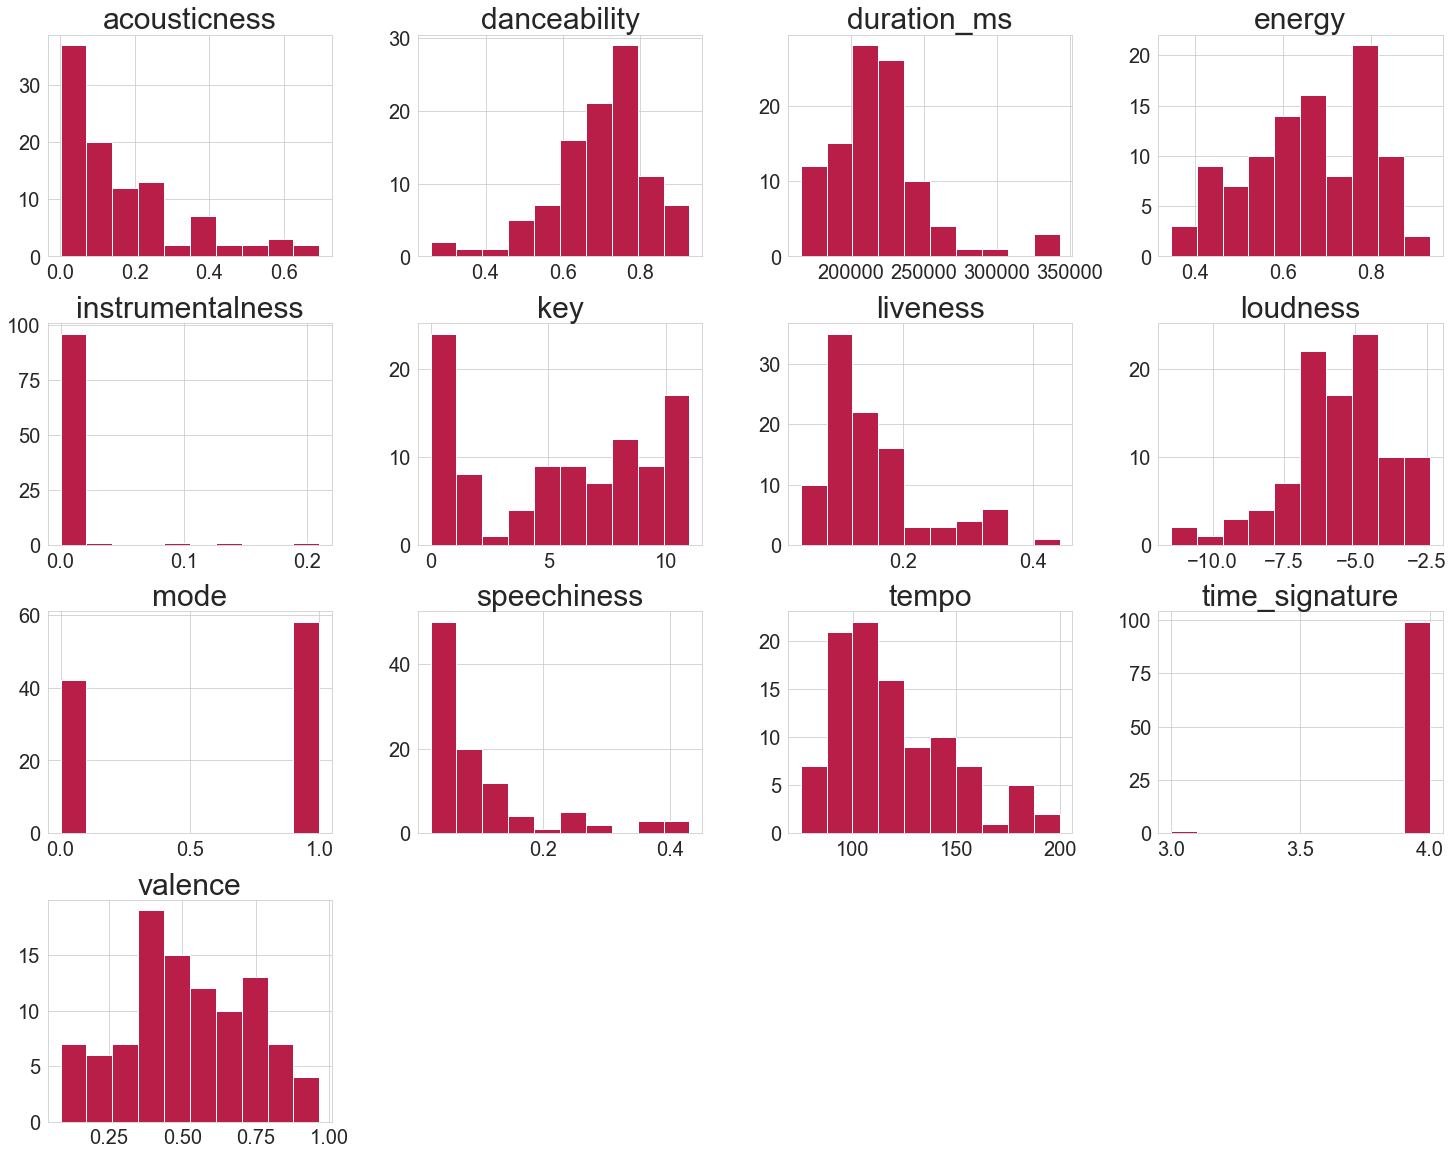

In [23]:
#Histogram of numerical features
top_tracks.hist()
plt.show()

In [24]:
#Further Analysis of danceability
top_tracks[top_tracks['danceability']>0.65].shape

(70, 16)

In [25]:
top_tracks[top_tracks['energy']>0.65].shape

(55, 16)

In [26]:
top_tracks[top_tracks['acousticness']>0.5].shape

(6, 16)

In [27]:
#Song name of the track with the highest valence
top_tracks[top_tracks['valence']==top_tracks['valence'].max()]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
23,79cuOz3SPQTuFrp8WgftA,There's Nothing Holdin' Me Back,Shawn Mendes,0.86,0.80,2.00,-4.04,1.00,0.06,0.38,0.00,0.09,0.97,122.00,"199,440.00",4.00


In [28]:
#Song name of the track with the lowest valence
top_tracks[top_tracks['valence']==top_tracks['valence'].min()]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
9,3NdDpSvN911VPGivFlV5d,"I Don’t Wanna Live Forever (Fifty Shades Darker) - From ""Fifty Shades Darker (Original Motion Picture Soundtrack)""",ZAYN,0.73,0.45,0.00,-8.37,1.00,0.06,0.06,0.00,0.33,0.09,117.97,"245,200.00",4.00


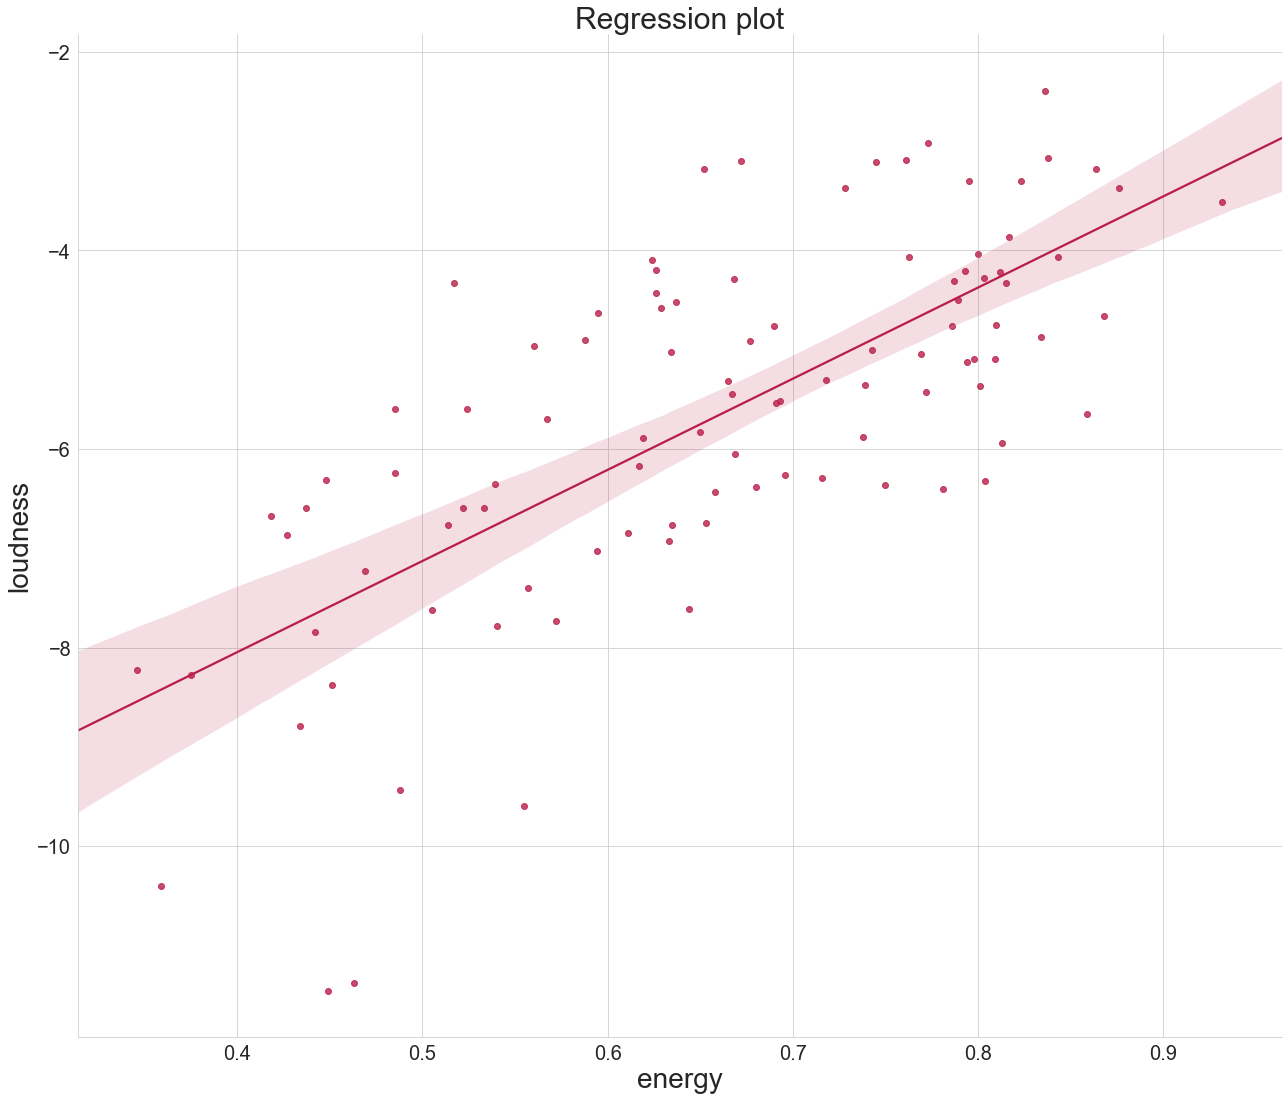

In [29]:
#Regression plot of energy and loudness
sns.lmplot(x='energy',y='loudness',data=top_tracks,height=15,aspect=1.2)
plt.title("Regression plot")
plt.show()

In [30]:
#Names of the columns
top_tracks.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

# Predictive Analysis

In [31]:
X = top_tracks[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

In [32]:
y = top_tracks['mode']

In [33]:
print(X.shape,y.shape)

(100, 10) (100,)


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =7,stratify = y)

In [35]:
print(X_train.shape,X_test.shape)

(75, 10) (25, 10)


## Decision Tree

In [36]:
param_grid = [{'max_depth' :[4,5,6,7,8],'min_samples_leaf' :[7,9,11,12,15],'max_features':[5,6,7,8,9]}]

In [37]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
print("Training set accuracy is {}".format(round(dtree.score(X_train,y_train),3)))
print("Test set accuracy is {}".format(dtree.score(X_test,y_test)))

Training set accuracy is 1.0
Test set accuracy is 0.52


In [39]:
#Grid Search
grid_search = GridSearchCV(dtree,param_grid,cv=5,scoring = 'neg_mean_squared_error')

In [40]:
grid_search.fit(X_train,y_train)

/Users/poojadeshpande91/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [4, 5, 6, 7, 8],
                          'max_features': [5, 6, 7, 8, 9],
                     

In [41]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 7}

In [42]:
#Model
dtree = DecisionTreeClassifier(max_depth=7,max_features =8,min_samples_leaf = 7,random_state=1)

In [43]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [44]:
print("Training set accuracy is {}".format(round(dtree.score(X_train,y_train),3)))

Training set accuracy is 0.827


In [45]:
print("Test set accuracy is {}".format(dtree.score(X_test,y_test)))

Test set accuracy is 0.64


In [46]:
y_pred = dtree.predict(X_test)

In [47]:
print("Confusion matrix of Decision Tree")
confusion_matrix(y_test,y_pred)

Confusion matrix of Decision Tree


array([[9, 1],
       [8, 7]])

In [48]:
print("Classification report")
class_report = classification_report(y_test,y_pred)
print(class_report)

Classification report
              precision    recall  f1-score   support

         0.0       0.53      0.90      0.67        10
         1.0       0.88      0.47      0.61        15

    accuracy                           0.64        25
   macro avg       0.70      0.68      0.64        25
weighted avg       0.74      0.64      0.63        25



In [49]:
y_prob = dtree.predict_proba(X_test)

In [50]:
#ROC AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])
print("AUC score:{}".format(auc_score))

AUC score:0.65


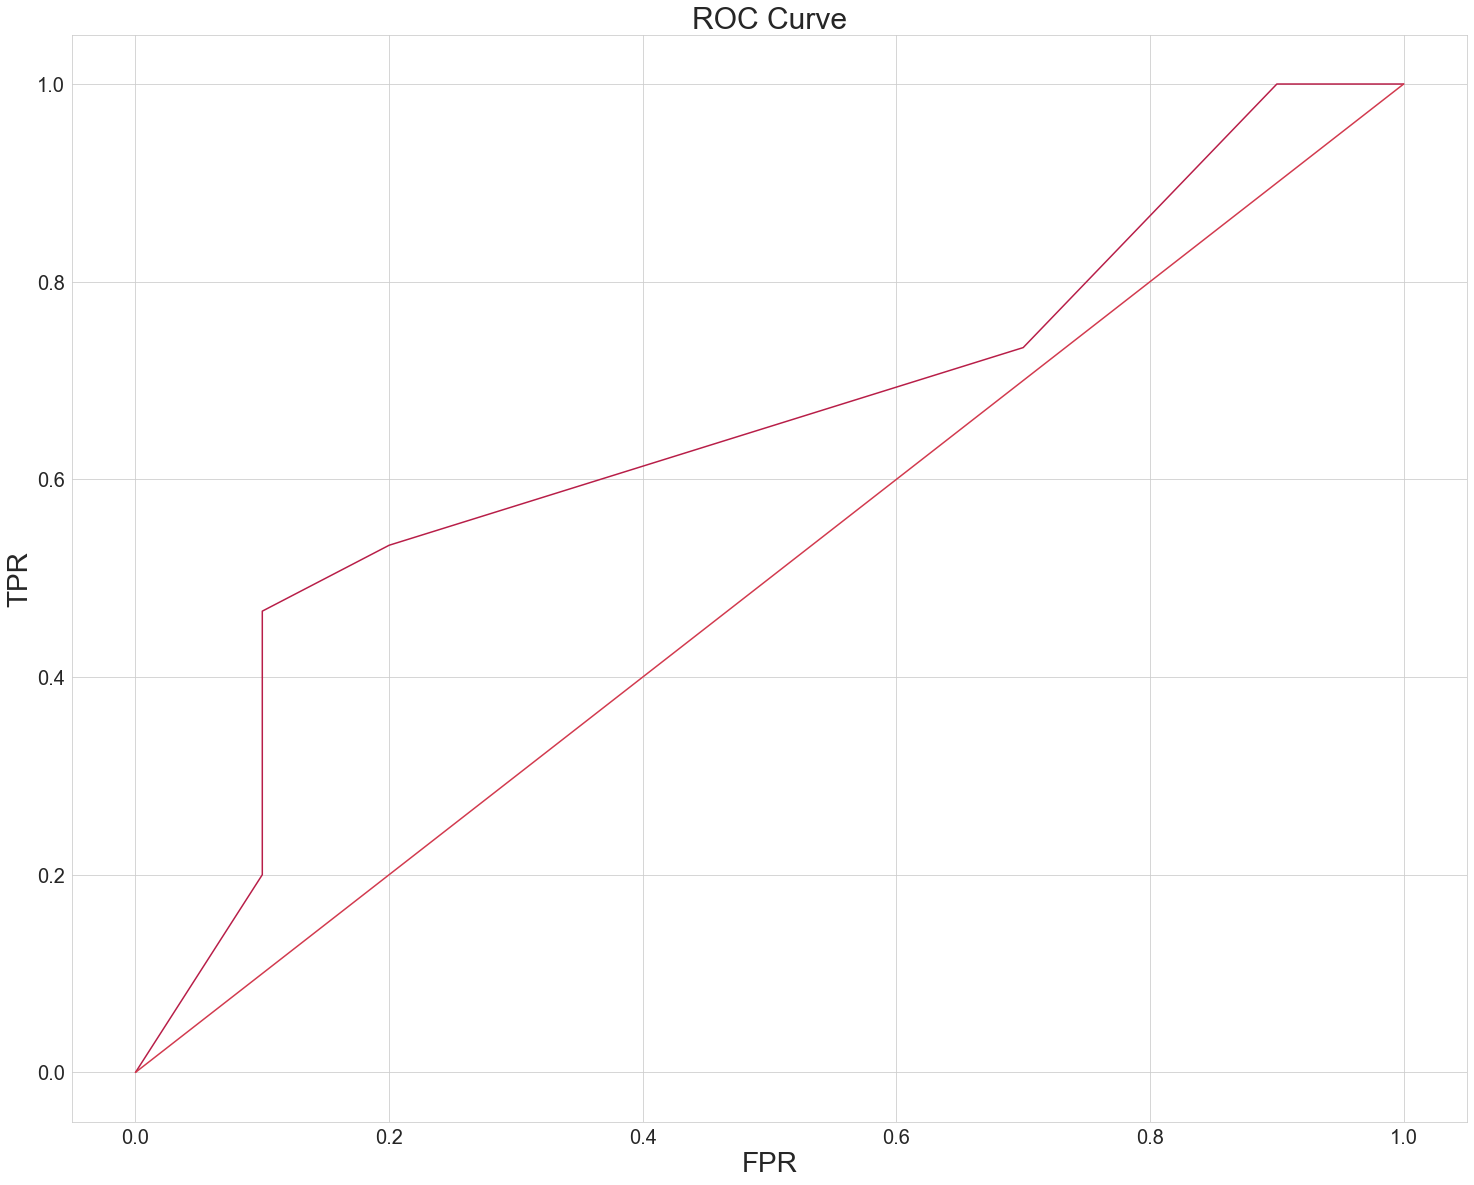

In [51]:
#ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Random Forest Classifier

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/Users/poojadeshpande91/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
print("Training set accuracy {}".format(round(rf.score(X_train,y_train),3)))
print("Test set accuracy {}".format(rf.score(X_test,y_test)))

Training set accuracy 0.987
Test set accuracy 0.6


In [77]:
param_grid = [{'n_estimators':[50,75,100],'max_features':[5,6,7,8,9],'max_depth':[5,6,7,8],'min_samples_leaf' :[3,6,7,9,10,12]}]

In [78]:
grid_search = GridSearchCV(rf,param_grid,scoring = 'neg_mean_squared_error',cv = 5)

In [79]:
grid_search.fit(X_train,y_train)

/Users/poojadeshpande91/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [88]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 3, 'n_estimators': 50}

In [89]:
rf = RandomForestClassifier(max_depth = 6,min_samples_leaf=3,max_features = 6,n_estimators=50,random_state=3)

In [90]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [93]:
print("Training set accuracy {}".format(round(rf.score(X_train,y_train),3)))

Training set accuracy 0.947


In [94]:
print("Test set accuracy {}".format(rf.score(X_test,y_test)))

Test set accuracy 0.52


In [95]:
y_pred = rf.predict(X_test)

In [96]:
confusion_matrix(y_test,y_pred)

array([[ 3,  7],
       [ 5, 10]])

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.38      0.30      0.33        10
         1.0       0.59      0.67      0.62        15

   micro avg       0.52      0.52      0.52        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.50      0.52      0.51        25



In [98]:
y_prob = dtree.predict_proba(X_test)

In [99]:
#ROC AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])
print("AUC score:{}".format(auc_score))

AUC score:0.65


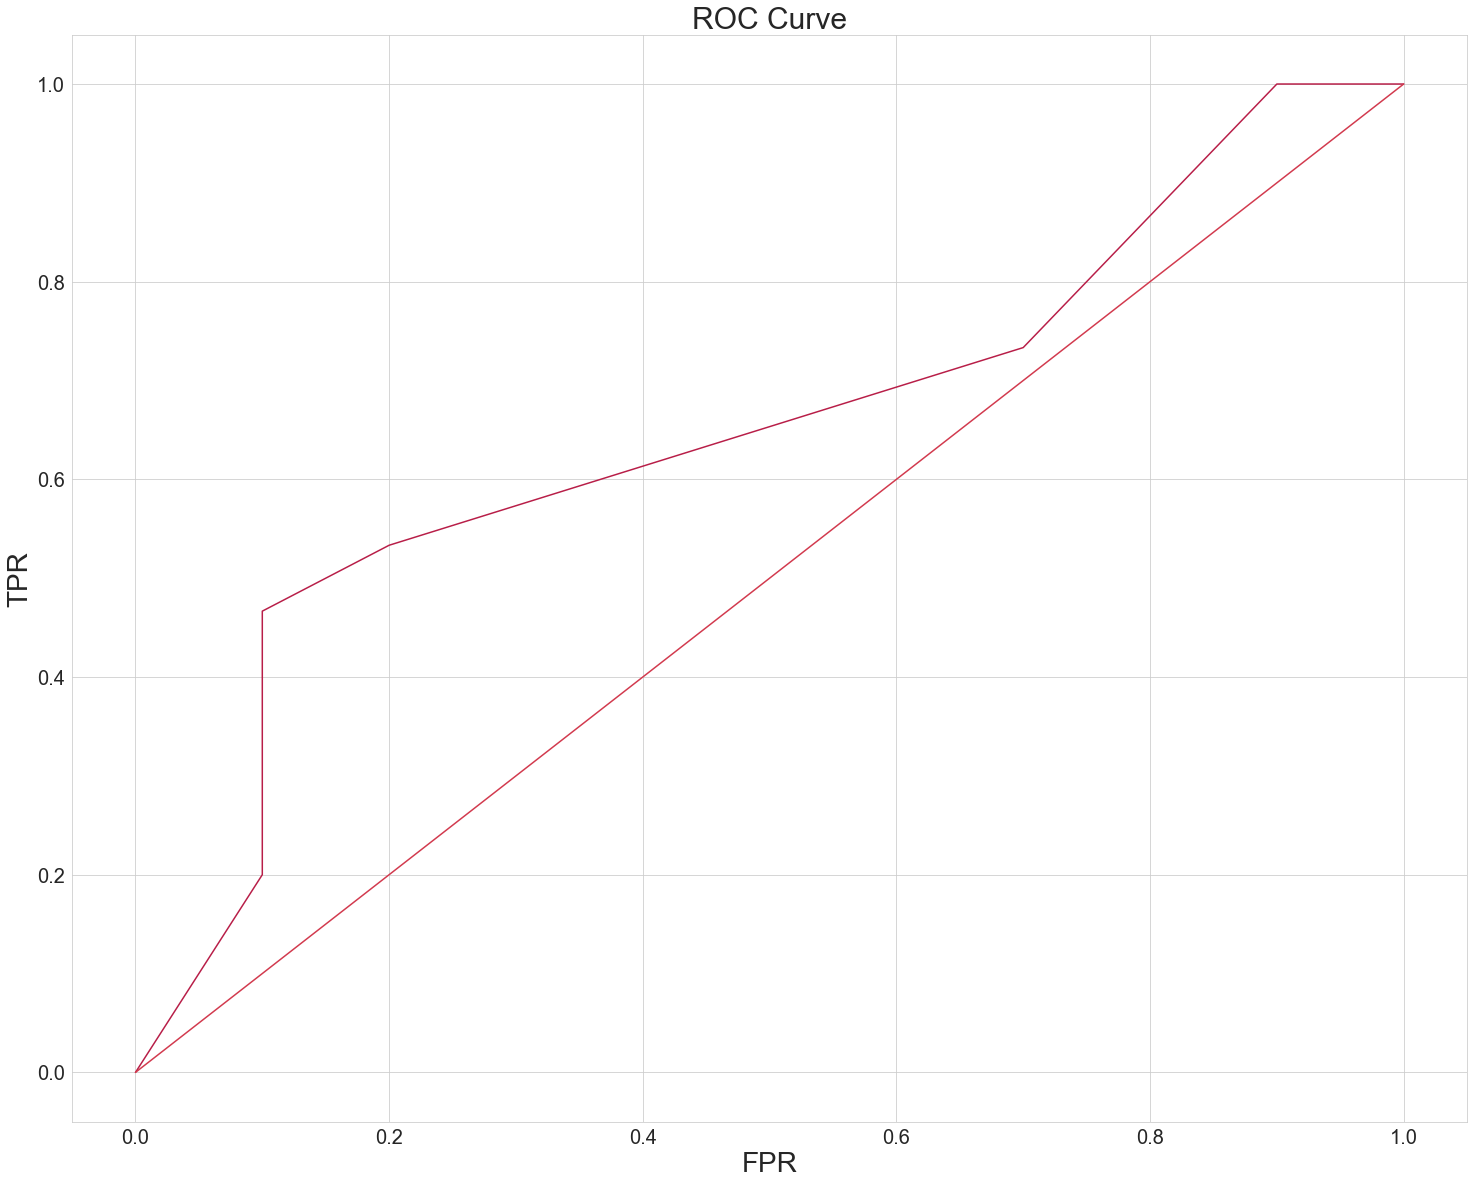

In [100]:
#ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()